In [50]:
### Save API Token, if needed

%set_env QXToken=db7904a26e50e782a870246662f692fcea1d09ac92184d1a0b2d7e1534d9d1acc4a3d3a8cd461863128b674c7b1186da56341c1cc8c7db12e5a62677294a91b3

# Make sure there is no space between the equal sign
# and the beginning of your token

env: QXToken=db7904a26e50e782a870246662f692fcea1d09ac92184d1a0b2d7e1534d9d1acc4a3d3a8cd461863128b674c7b1186da56341c1cc8c7db12e5a62677294a91b3


In [51]:
from qiskit.circuit.random import random_circuit
from qiskit.circuit.library import XGate, YGate
from qiskit_ibm_runtime.fake_provider import FakeTorino, FakeOsaka
from qiskit.transpiler import InstructionProperties, PassManager
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.transpiler.preset_passmanagers.plugin import list_stage_plugins
from qiskit.transpiler.timing_constraints import TimingConstraints
from qiskit.transpiler.passes.scheduling import ASAPScheduleAnalysis,PadDynamicalDecoupling
from qiskit.visualization.timeline import draw, IQXStandard
from qiskit.transpiler import StagedPassManager
from qiskit.visualization import plot_circuit_layout
import matplotlib.pyplot as plt
import numpy as np

In [52]:
from qc_grader.challenges.iqc_2024 import (
    grade_lab2_ex1,
    grade_lab2_ex2,
    grade_lab2_ex3,
    grade_lab2_ex4,
    grade_lab2_ex5
)

In [53]:
ans = {}

ans["init"] = "C"
ans["layout"] = "D"
ans["routing"] = "B"
ans["translation"] = "F"
ans["optimization"] = "A"
ans["scheduling"] = "E"


In [54]:
grade_lab2_ex1(ans)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


In [55]:
from util import *
version_check()


You have the right version! Enjoy the challenge!


In [56]:
def scoring( qc, backend):
    

    layout = qc._layout
    fidelity = transpile_scoring(qc, layout, backend)
    score = 1-fidelity

    return score

In [57]:
# Submit your answer using following code

grade_lab2_ex2(scoring)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


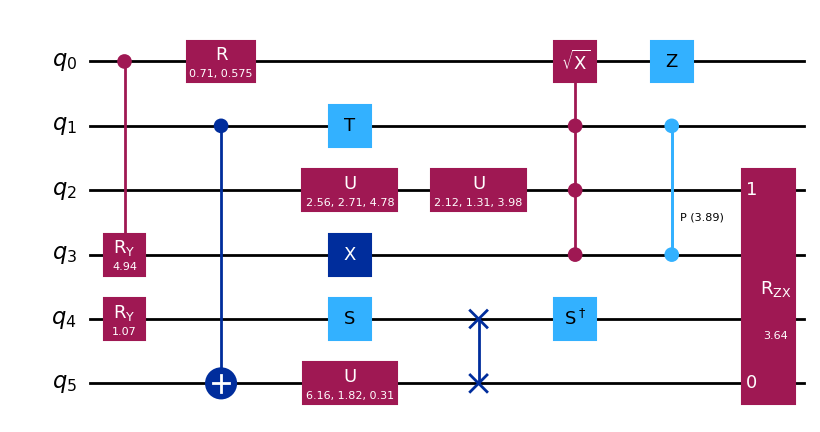

In [58]:
import matplotlib.pyplot as plt
from qiskit.circuit.random import random_circuit

# Set the seed
seed = 10000

# Define the number of qubits and the depth of the circuit
num_qubits = 6
depth = 4

# Create the random circuit
qc = random_circuit(num_qubits, depth, measure=False, seed=seed)

# Draw the circuit
qc.draw('mpl')


In [59]:
## Save FakeTorino as backend

backend = FakeTorino()

In [60]:
circuit_depths = {
    'opt_lv_0': None,
    'opt_lv_1': None,
    'opt_lv_2': None,
    'opt_lv_3': None,
}
gate_counts = {
    'opt_lv_0': None,
    'opt_lv_1': None,
    'opt_lv_2': None,
    'opt_lv_3': None,
}

scores = {
    'opt_lv_0': None,
    'opt_lv_1': None,
    'opt_lv_2': None,
    'opt_lv_3': None,
}

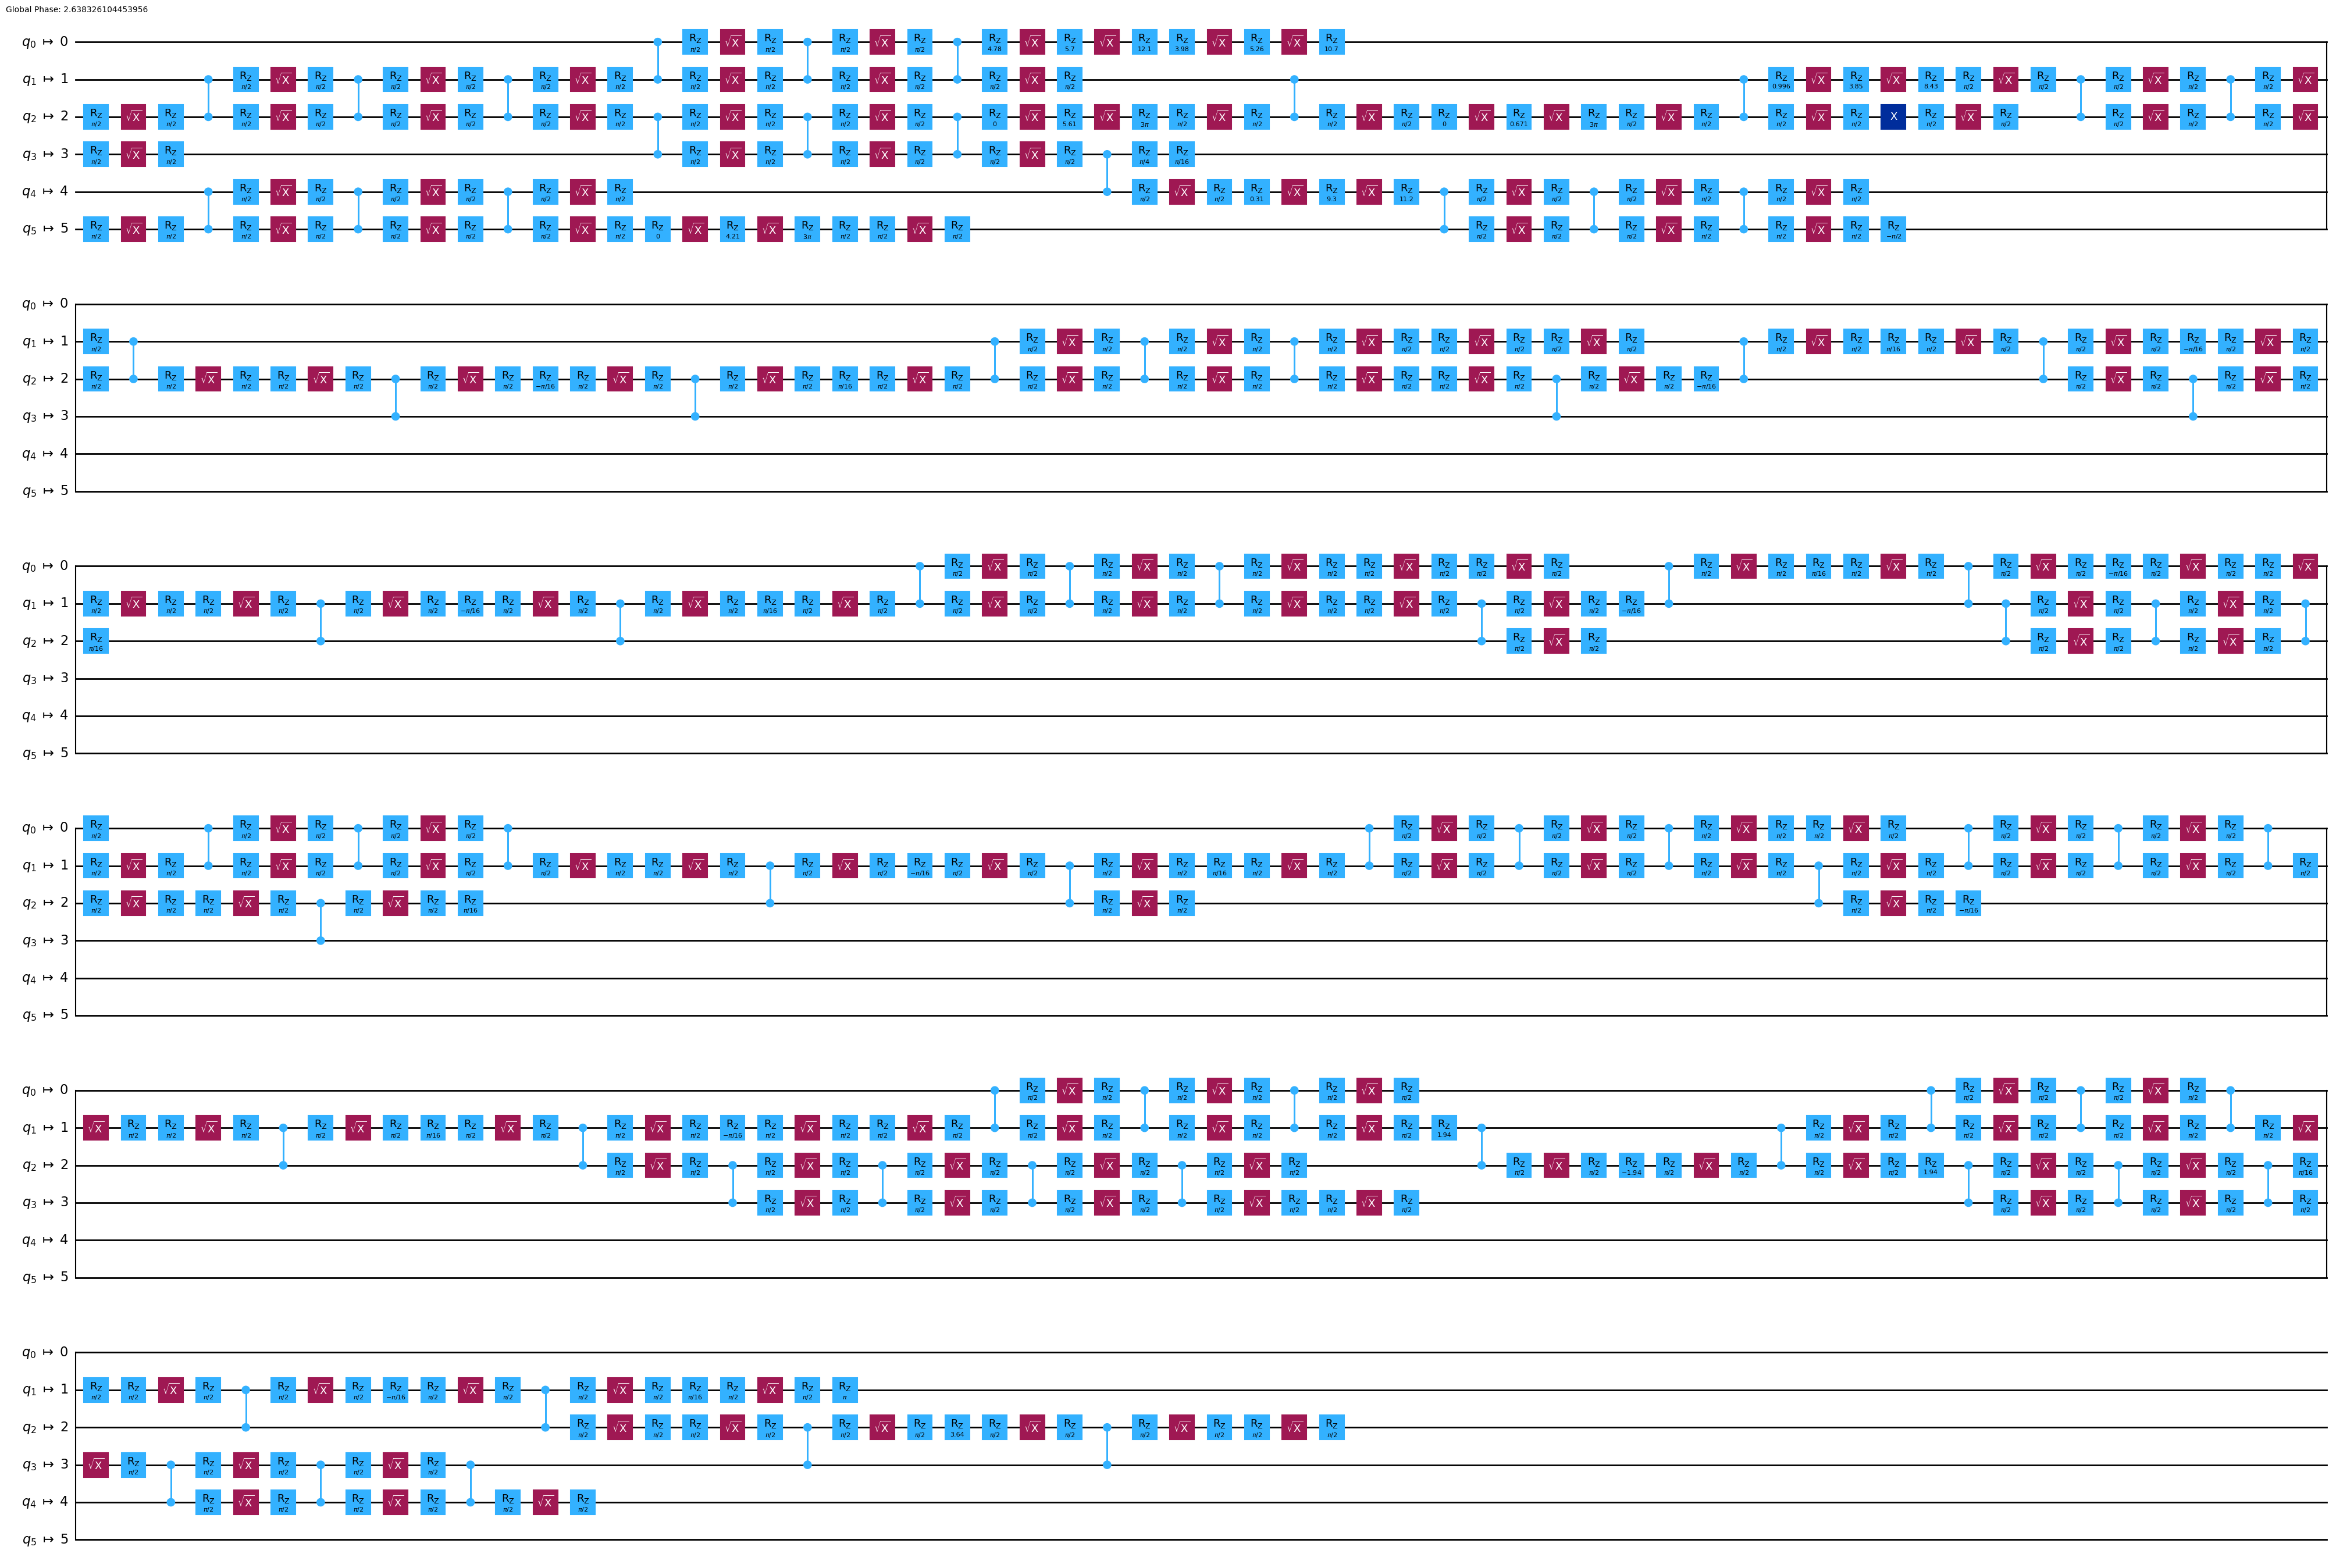

In [61]:
# Make a pass manager with our desired optimization level and backend
pm_lv0 = generate_preset_pass_manager(backend=backend, optimization_level=0, seed_transpiler=seed)

# Run for our random circuit
tr_lv0 = pm_lv0.run(qc)
tr_lv0.draw('mpl', idle_wires=False, fold=60)


In [62]:
circuit_depths['opt_lv_0'] =tr_lv0.depth()
gate_counts['opt_lv_0'] =tr_lv0.count_ops()
scores['opt_lv_0'] =scoring(tr_lv0,backend)

In [63]:
print("Optimization level 0 results")
print("====================")
print("Circuit depth:", circuit_depths['opt_lv_0'])
print("Gate count:", gate_counts['opt_lv_0'])
print("Score:", scores['opt_lv_0'])

Optimization level 0 results
Circuit depth: 334
Gate count: OrderedDict({'rz': 394, 'sx': 186, 'cz': 78, 'x': 1})
Score: 0.378009145088254


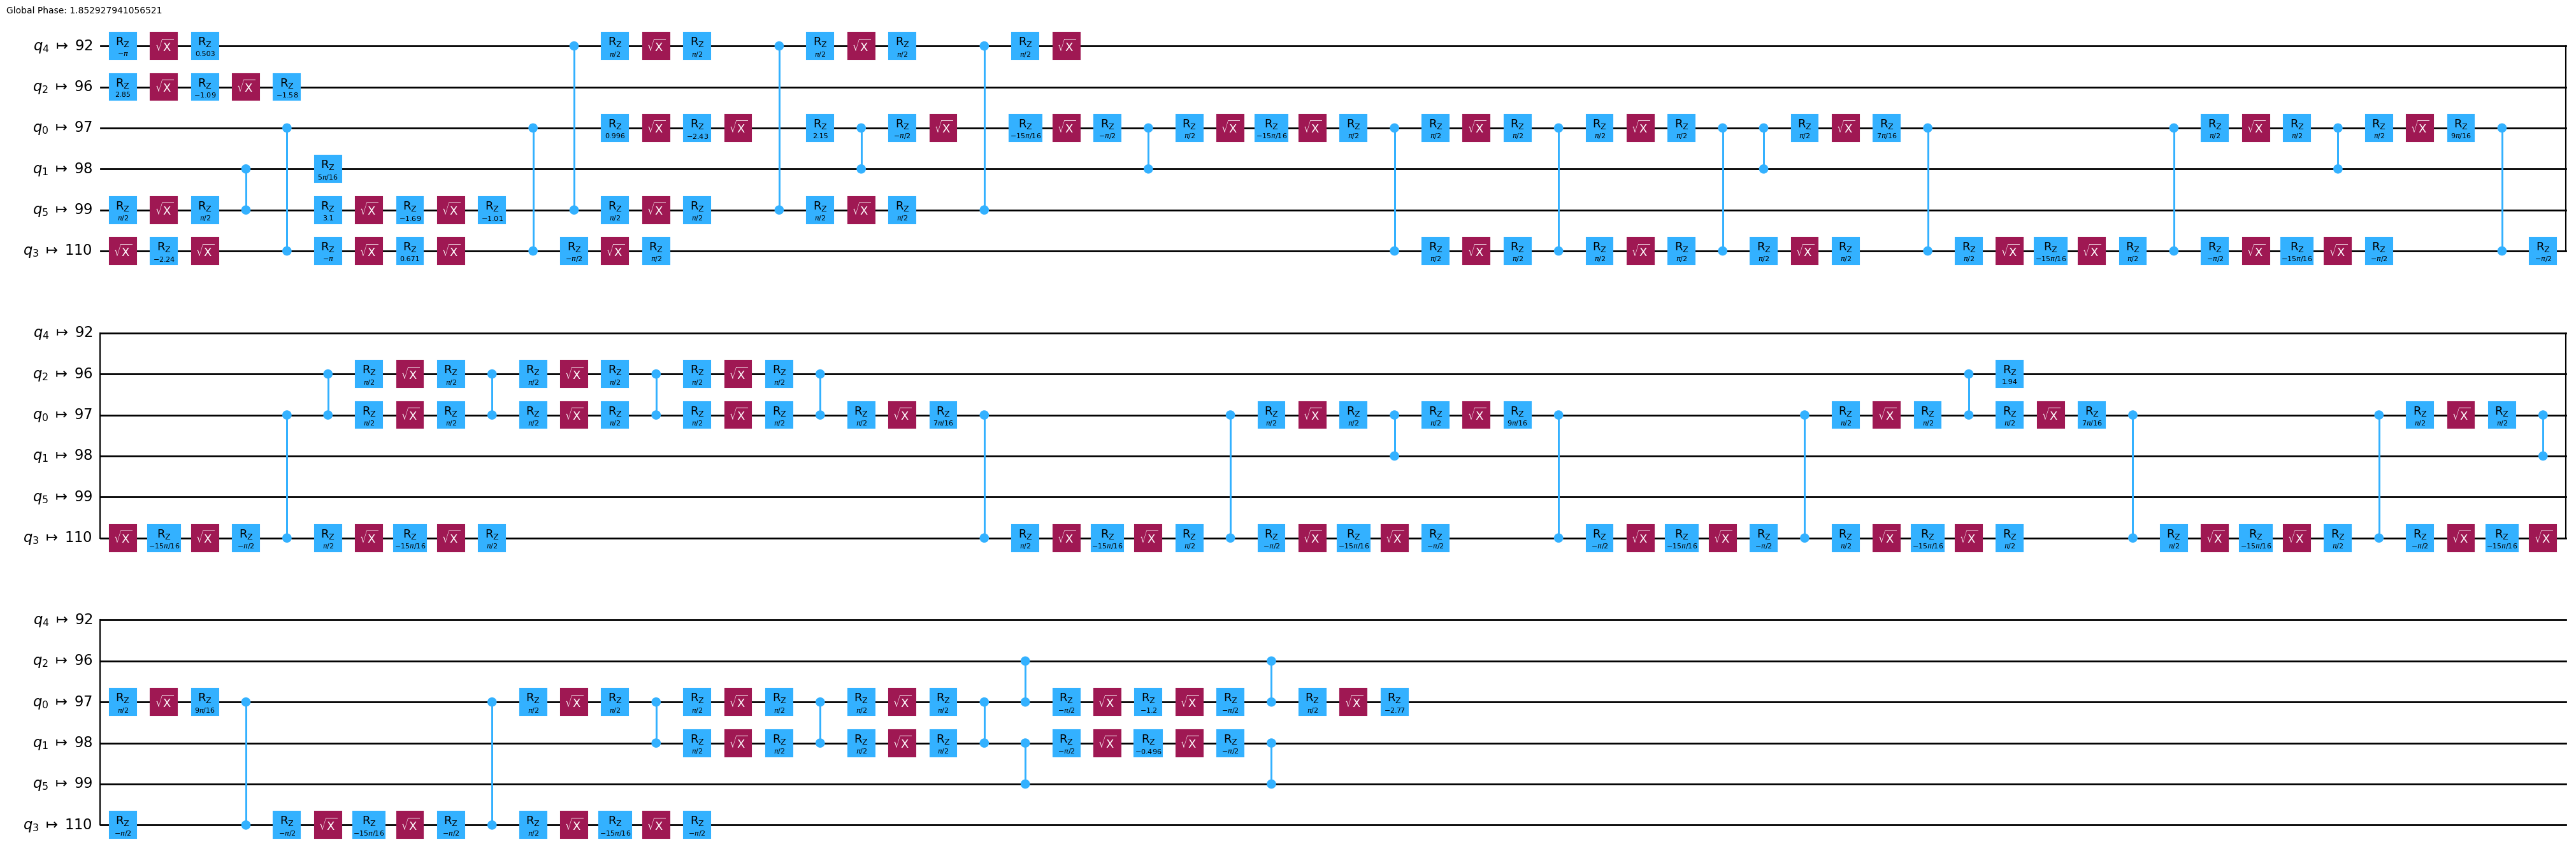

In [64]:
pm_lv1 = generate_preset_pass_manager(backend=backend, optimization_level=1, seed_transpiler=seed)


tr_lv1 = pm_lv1.run(qc)
tr_lv1.draw('mpl', idle_wires=False, fold=60)

In [65]:
circuit_depths['opt_lv_1'] = tr_lv1.depth()
gate_counts['opt_lv_1'] = tr_lv1.count_ops()
scores['opt_lv_1'] =scoring(tr_lv1,backend)

In [66]:
print("Optimization level 1 results")
print("====================")
print("Circuit depth:", circuit_depths['opt_lv_1'])
print("Gate count:", gate_counts['opt_lv_1'])
print("Score:", scores['opt_lv_1'])

Optimization level 1 results
Circuit depth: 147
Gate count: OrderedDict({'rz': 131, 'sx': 77, 'cz': 39})
Score: 0.10053438782707702


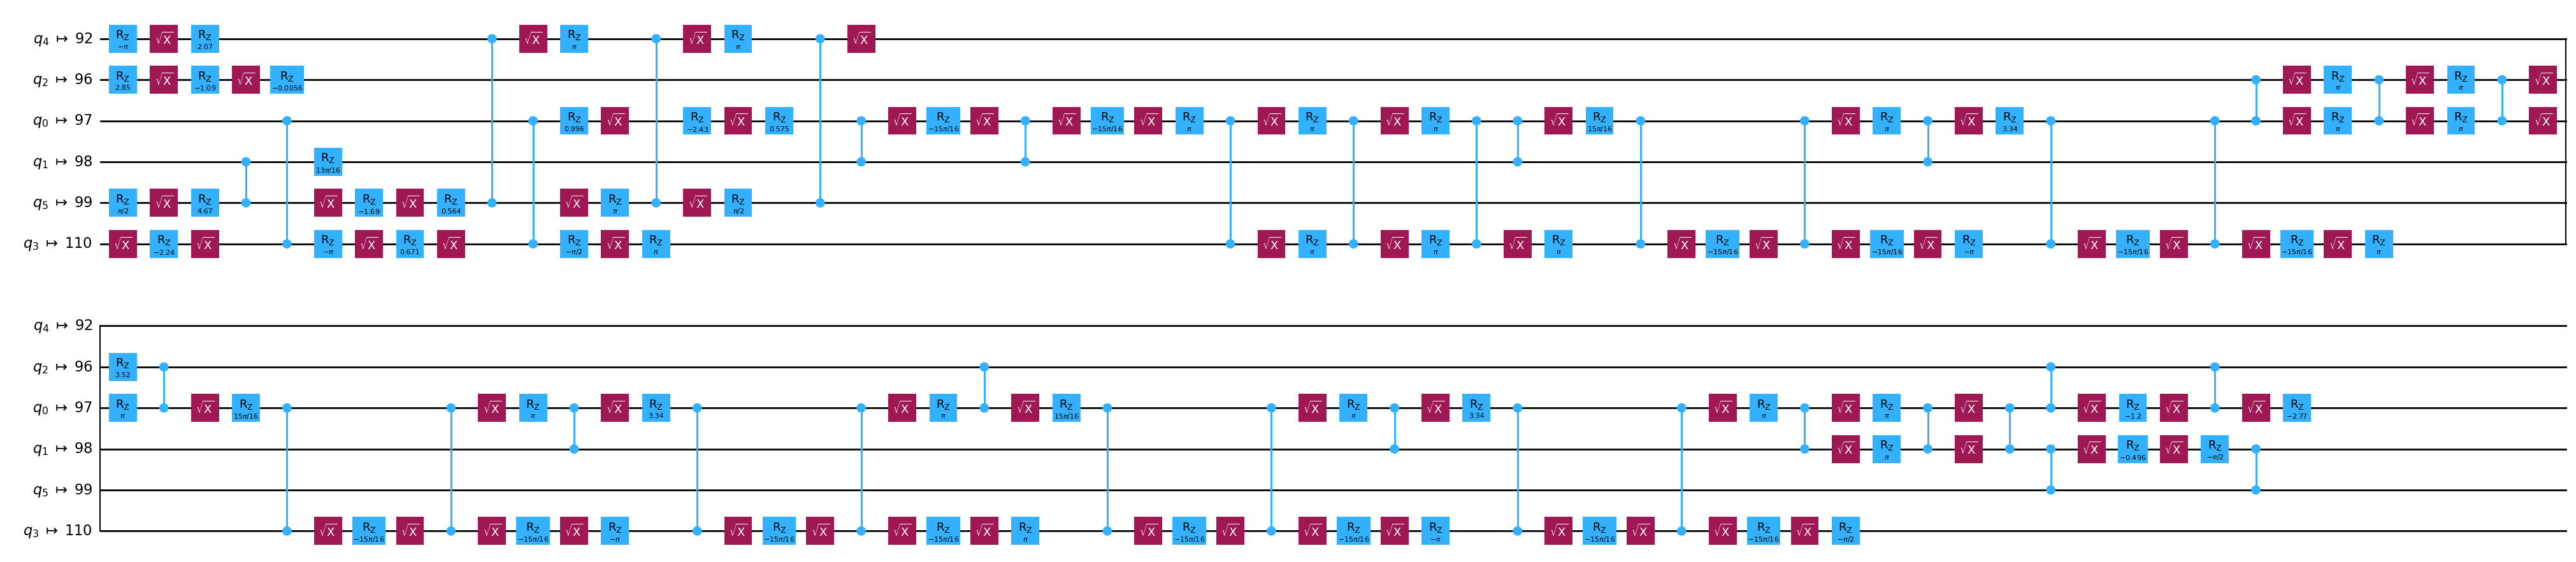

In [67]:
pm_lv2 = generate_preset_pass_manager(backend=backend, optimization_level=2, seed_transpiler=seed)


tr_lv2 = pm_lv2.run(qc)
tr_lv2.draw('mpl', idle_wires=False, fold=60)


In [68]:
circuit_depths['opt_lv_2'] = tr_lv2.depth()
gate_counts['opt_lv_2'] = tr_lv2.count_ops()
scores['opt_lv_2'] =scoring(tr_lv2,backend)

In [69]:
print("Optimization level 2 results")
print("====================")
print("Circuit depth:", circuit_depths['opt_lv_2'])
print("Gate count:", gate_counts['opt_lv_2'])
print("Score:", scores['opt_lv_2'])

Optimization level 2 results
Circuit depth: 110
Gate count: OrderedDict({'sx': 77, 'rz': 71, 'cz': 39})
Score: 0.10053438782707702


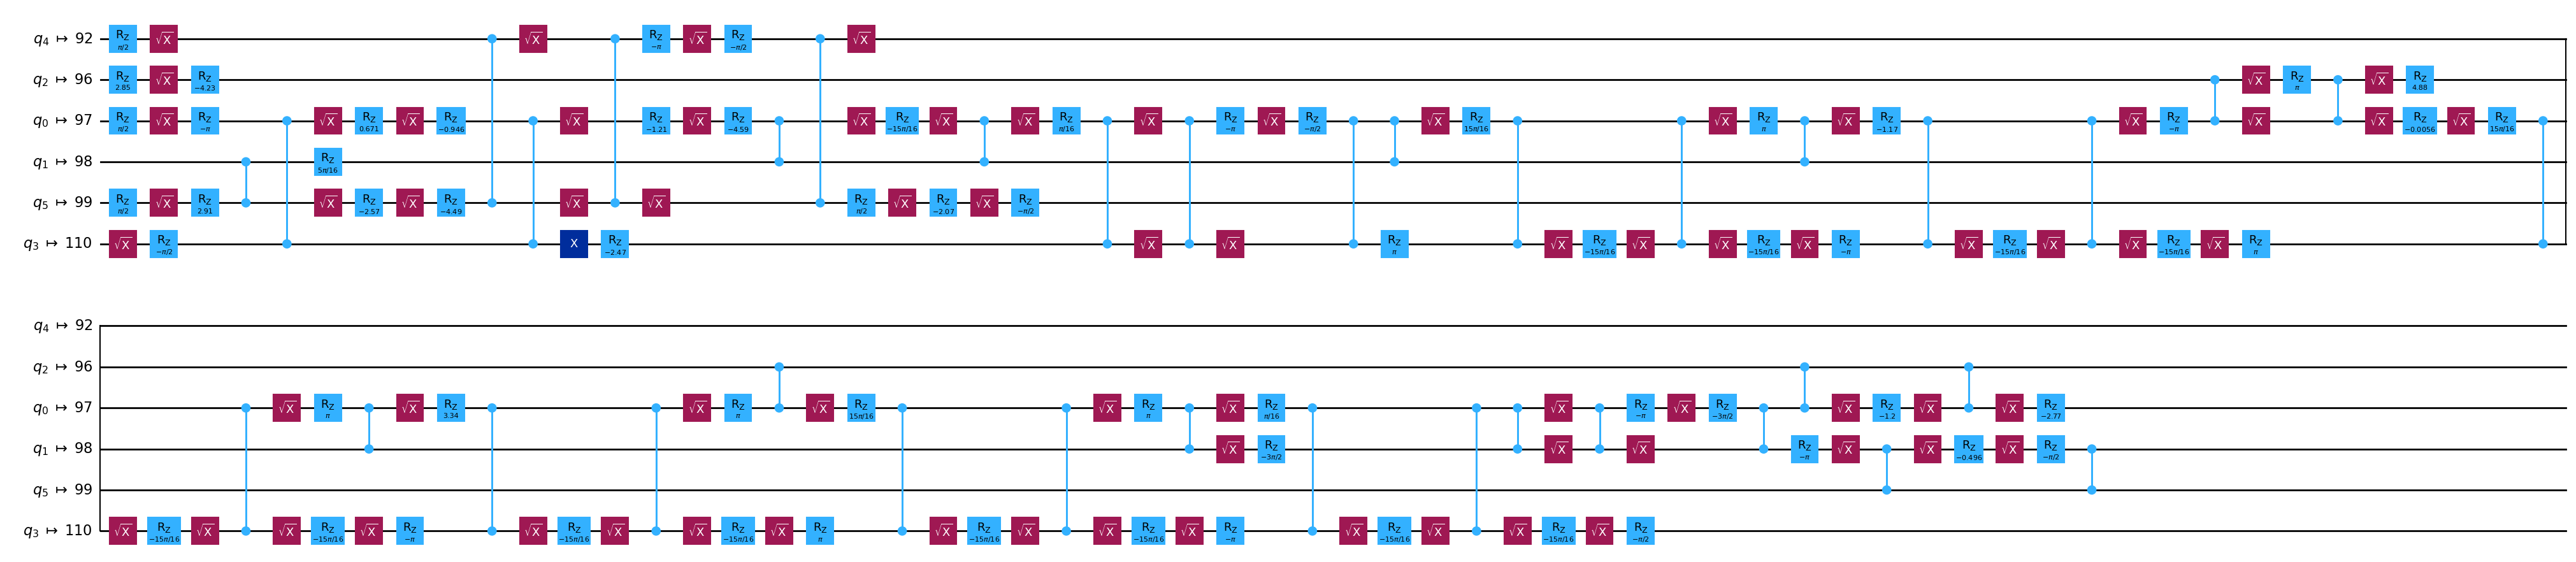

In [70]:
pm_lv3 =generate_preset_pass_manager(backend=backend, optimization_level=3, seed_transpiler=seed)

tr_lv3 =pm_lv3.run(qc)


tr_lv3.draw('mpl', idle_wires=False, fold=60)

In [71]:
### Your code here ###

circuit_depths['opt_lv_3'] =tr_lv3.depth()
gate_counts['opt_lv_3'] =tr_lv3.count_ops()
scores['opt_lv_3'] =scoring(tr_lv3,backend)
### Don't change code after this line ###

print("Optimization level 3 results")
print("====================")
print("Circuit depth:", circuit_depths['opt_lv_3'])
print("Gate count:", gate_counts['opt_lv_3'])
print("Score:", scores['opt_lv_3'])

Optimization level 3 results
Circuit depth: 105
Gate count: OrderedDict({'sx': 75, 'rz': 66, 'cz': 37, 'x': 1})
Score: 0.096378817130777


In [72]:
ans = [pm_lv0, pm_lv1, pm_lv2, pm_lv3]

grade_lab2_ex3(ans)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


In [73]:

list_stage_plugins("init")

['default']

In [74]:
print("Plugins run by default init stage")
print("=================================")

for i in range(4):
    print(f"\nOptimization level {i}:")
    pm = generate_preset_pass_manager(backend=backend, optimization_level=i, init_method="default", seed_transpiler=1000)
    for task in pm.init.to_flow_controller().tasks:
        print(" -", type(task).__name__)

Plugins run by default init stage

Optimization level 0:
 - UnitarySynthesis
 - HighLevelSynthesis
 - BasisTranslator

Optimization level 1:
 - UnitarySynthesis
 - HighLevelSynthesis
 - BasisTranslator
 - InverseCancellation

Optimization level 2:
 - UnitarySynthesis
 - HighLevelSynthesis
 - BasisTranslator
 - InverseCancellation

Optimization level 3:
 - UnitarySynthesis
 - HighLevelSynthesis
 - BasisTranslator
 - OptimizeSwapBeforeMeasure
 - RemoveDiagonalGatesBeforeMeasure
 - InverseCancellation


In [75]:
list_stage_plugins("layout")

['default', 'dense', 'sabre', 'trivial']

In [76]:
for option in list_stage_plugins("layout"):
    pm = generate_preset_pass_manager(backend=backend, optimization_level=3, layout_method=option, seed_transpiler=seed)
    qc_tr = pm.run(qc)
    score = scoring(qc_tr, backend)

    print(f"Layout method = {option}")
    print(f"Score: {score:.6f}")
    print(f"Layout: {qc_tr.layout.final_index_layout()}\n")

Layout method = default
Score: 0.277188
Layout: [85, 84, 83, 93, 73, 82]

Layout method = dense
Score: 0.188764
Layout: [37, 52, 51, 49, 56, 50]

Layout method = sabre
Score: 0.277188
Layout: [85, 84, 83, 93, 73, 82]

Layout method = trivial
Score: 0.333659
Layout: [0, 1, 2, 4, 5, 3]



In [77]:
list_stage_plugins("routing")

['basic', 'lookahead', 'none', 'sabre', 'stochastic']

In [78]:
print("Number of each gates of transpiled circuit and the score")
print("=================================")
for i in range(4):
    print(f"\nOptimization level {i}:")
    pm = generate_preset_pass_manager(backend=backend, optimization_level=i, routing_method='basic', seed_transpiler=seed)
    qc_tr = pm.run(qc)
    score = scoring(qc_tr, backend)
    for key, value in qc_tr.count_ops().items():
        print(key, ":", value)
    print(f"Score: {score:.6f}")

Number of each gates of transpiled circuit and the score

Optimization level 0:
rz : 406
sx : 192
cz : 81
x : 1
Score: 0.443191

Optimization level 1:
rz : 167
sx : 95
cz : 48
Score: 0.133092

Optimization level 2:
sx : 95
rz : 90
cz : 48
Score: 0.133092

Optimization level 3:
sx : 92
rz : 79
cz : 42
x : 1
Score: 0.121427


In [79]:
## process stopped due to lookahead
options = ['basic','sabre', 'stochastic']

for option in options:
    print(f"Layout option = {option}:")
    pm = generate_preset_pass_manager(backend=backend, optimization_level=3, routing_method=option, seed_transpiler=seed)
    qc_tr = pm.run(qc)
    score = scoring(qc_tr, backend)

    print(f"Score: {score:.6f}")

    for key, value in qc_tr.count_ops().items():
        print(key, ":", value)
    print("\n")

Layout option = basic:
Score: 0.121427
sx : 92
rz : 79
cz : 42
x : 1


Layout option = sabre:
Score: 0.096379
sx : 75
rz : 66
cz : 37
x : 1


Layout option = stochastic:
Score: 0.169450
sx : 136
rz : 107
cz : 66




In [80]:
print("Number of each gates of transpiled circuit")
print("=================================")

for i in range(4):
    print(f"\nOptimization level {i}:")
    pm = generate_preset_pass_manager(backend=backend, optimization_level=i, translation_method='translator', seed_transpiler=seed)
    qc_tr = pm.run(qc)
    score = scoring(qc_tr, backend)
    for key, value in qc_tr.count_ops().items():
        print(key, ":", value)
    print(f"Score: {score:.6f}")

Number of each gates of transpiled circuit

Optimization level 0:
rz : 394
sx : 186
cz : 78
x : 1
Score: 0.378009

Optimization level 1:
rz : 131
sx : 77
cz : 39
Score: 0.100534

Optimization level 2:
sx : 77
rz : 71
cz : 39
Score: 0.100534

Optimization level 3:
sx : 75
rz : 66
cz : 37
x : 1
Score: 0.096379


In [81]:
options = ['translator', 'synthesis']

print("Number of each gates of transpiled circuit")
print("=================================")

for option in options:
    print(f"Layout option = {option}:")
    pm = generate_preset_pass_manager(backend=backend, optimization_level=3, translation_method=option, seed_transpiler=seed)
    qc_tr = pm.run(qc)
    score = scoring(qc_tr, backend)
    for key, value in qc_tr.count_ops().items():
        print(key, ":", value)
    print(f"Score: {score:.6f}")
    print("\n")

Number of each gates of transpiled circuit
Layout option = translator:
sx : 75
rz : 66
cz : 37
x : 1
Score: 0.096379


Layout option = synthesis:
sx : 73
rz : 71
cz : 37
x : 12
Score: 0.099269




In [82]:
tr_depths = []
tr_gate_counts = []
tr_scores = []

options = ['translator', 'synthesis']

for i in range(4):
    for option in options:
        pm = generate_preset_pass_manager(backend=backend, optimization_level=i, translation_method=option, seed_transpiler=seed)

        tr_depths.append(pm.run(qc).depth())
        tr_gate_counts.append(sum(pm.run(qc).count_ops().values()))
        tr_scores.append(scoring(pm.run(qc), backend))

In [83]:
pm_ex4 = generate_preset_pass_manager(
    backend=backend,
    optimization_level=3,
    layout_method='sabre',
    routing_method='sabre',
    translation_method='synthesis'
)

In [84]:
grade_lab2_ex4(pm_ex4)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


In [87]:
X = XGate()
Y = YGate()

dd_sequence = [X, Y, X, Y]

In [88]:
backend=FakeTorino()

target = backend.target

y_gate_properties = {}
for qubit in range(target.num_qubits):
    y_gate_properties.update(
        {
            (qubit,): InstructionProperties(
                duration=target["x"][(qubit,)].duration,
                error=target["x"][(qubit,)].error,
            )
        }
    )

target.add_instruction(YGate(), y_gate_properties)

In [89]:
dd_pm = PassManager(
    [
        ASAPScheduleAnalysis(target=target),
        PadDynamicalDecoupling(target=target, dd_sequence=dd_sequence)
    ]
)

In [93]:
backend_timing = backend.target.timing_constraints()
timing_constraints = TimingConstraints(
    granularity=backend_timing.granularity,
    min_length=backend_timing.min_length,
    pulse_alignment=backend_timing.pulse_alignment,
    acquire_alignment=backend_timing.acquire_alignment )

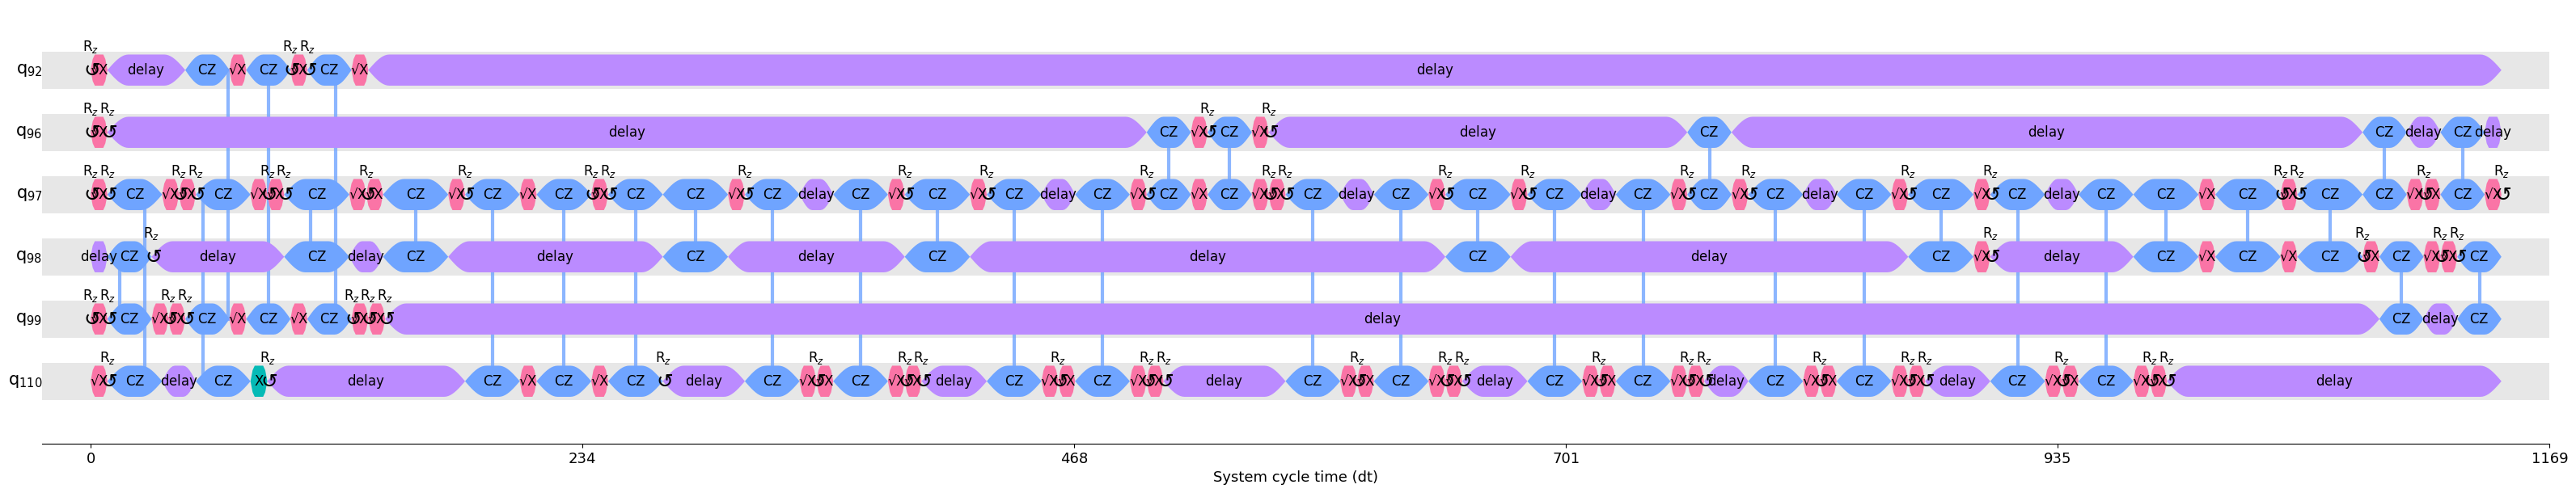

In [96]:
# Run with optimization level 3 and 'asap' scheduling pass
pm_asap = generate_preset_pass_manager(
    optimization_level=3,
    backend=backend,
    timing_constraints=timing_constraints,
    scheduling_method="asap",
    seed_transpiler=seed,
)
my_style = {
    'formatter.general.fig_width': 40,
    'formatter.general.fig_unit_height': 1,
}

draw(pm_asap.run(qc), style=IQXStandard(**my_style), show_idle=False, show_delays=True)

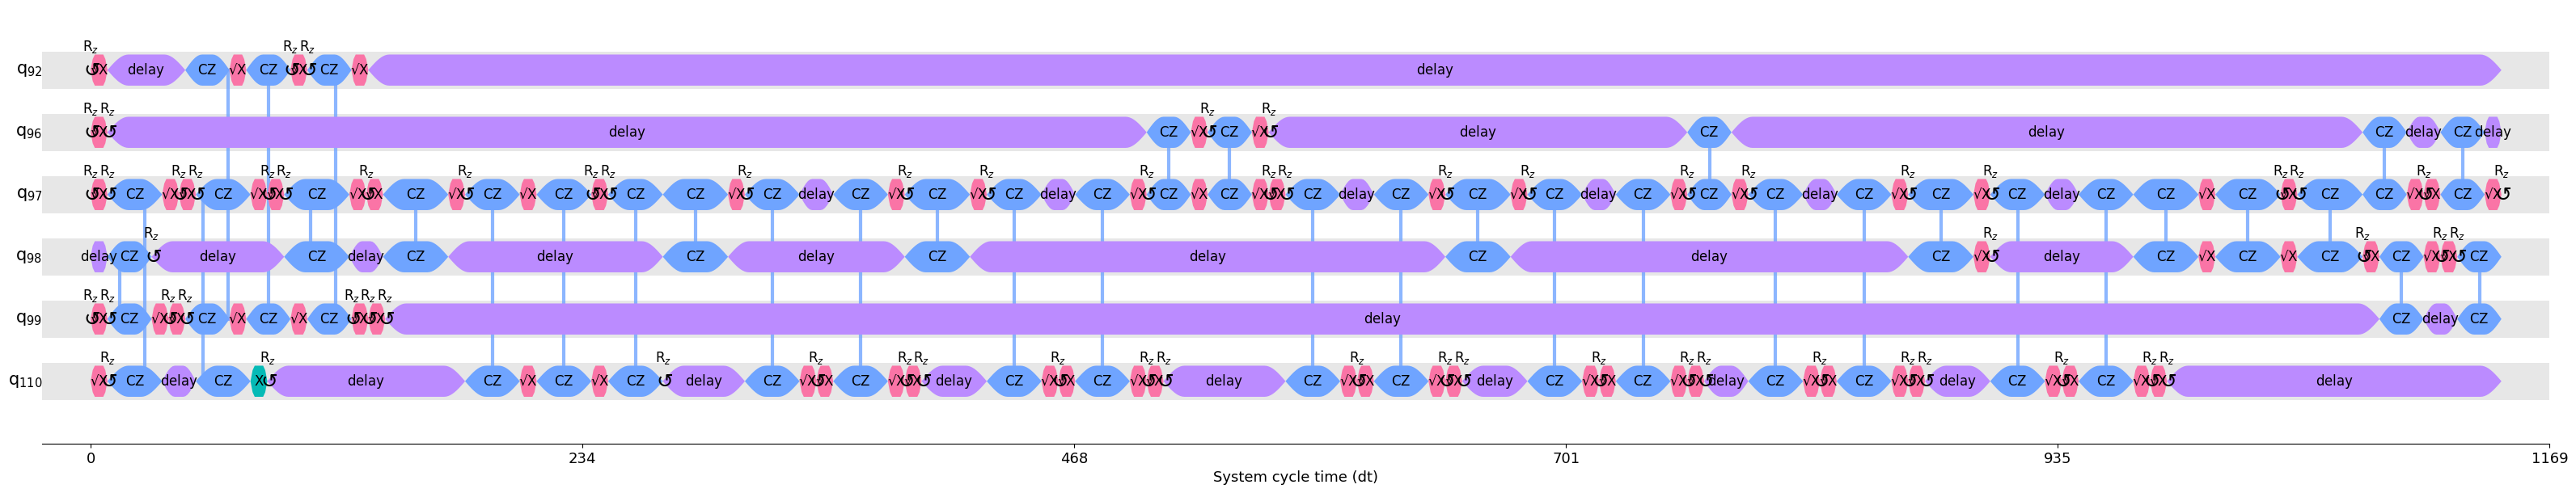

In [97]:
draw(pm_asap.run(qc), style=IQXStandard(**my_style), show_idle=False, show_delays=True)

In [99]:
staged_pm_dd = StagedPassManager(
    stages=["scheduling"],
    scheduling=dd_pm
)

In [100]:
grade_lab2_ex5(staged_pm_dd)


Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.
